In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# Read the dataset
data = pd.read_csv("data/adult.csv")

# Exploratory Data Analysis

# Data cleaning & transformation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe(include = "all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Target of interest - Income
data.income.value_counts() #<- 2 classes - above 50K & below 50K income - labels

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [7]:
# Check the number of nulls in each column
data.isnull().sum()    #<- No null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
# Take numerical columns and categorical columns separately
num_df = data.select_dtypes(include = [np.number])
num_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [9]:
cat_df = data.select_dtypes(include = ['object'])
cat_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
# Find the value counts of categorical columns to check junk
for i in cat_df.columns:
    print("\n" + i + "\n")
    print(cat_df[i].value_counts())


workclass

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

education

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

occupation

Prof-specialty       6172
Craft-repair         6

In [11]:
# Replace ? in workclass,occupation & native_country with Other
data['workclass'] = data['workclass'].replace('?', 'Other')
data['occupation'] = data['occupation'].replace('?', 'Other')
data['native-country'] = data['native-country'].replace('?', 'Other')

In [12]:
# Check for non numeric entries & coerce to nan in numeric columns
num_df[~num_df.applymap(np.isreal).all(1)]


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week


In [13]:
# Another way of checking non numeric entries - column wise
pd.to_numeric(num_df['age'], errors = "coerce").isnull().value_counts()

False    48842
Name: age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290EA803160>,
      dtype=object)

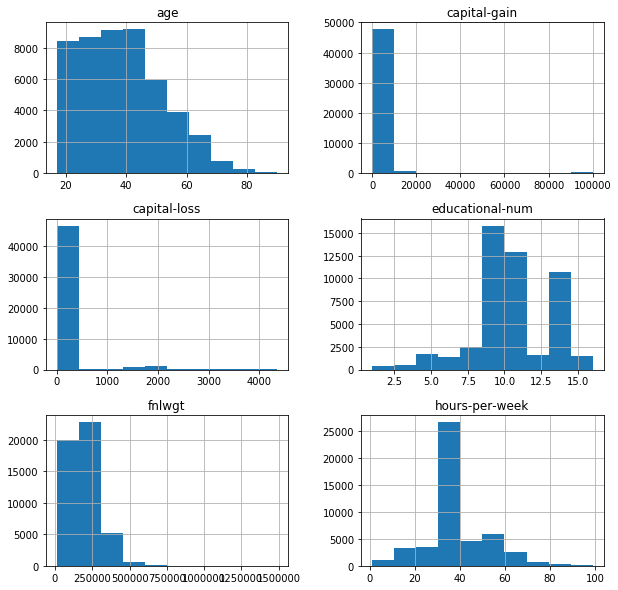

In [14]:
num_df.hist(figsize= (10,10))

In [15]:
num_df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
# Convert categorical columns to dummies
workclass = pd.get_dummies(data['workclass'], drop_first= True)
education = pd.get_dummies(data['education'], drop_first=True)
marital_status = pd.get_dummies(data['marital-status'], drop_first= True)
occupation = pd.get_dummies(data['occupation'], drop_first= True)
relationship = pd.get_dummies(data['relationship'], drop_first = True)
race = pd.get_dummies(data['race'], drop_first = True)
gender = pd.get_dummies(data['gender'], drop_first = True)
native_country = pd.get_dummies(data['native-country'], drop_first = True)

In [18]:
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
           'race', 'gender', 'native-country'], axis = 1, inplace = True)

In [19]:
data = pd.concat([data, workclass, education, marital_status, occupation, relationship, race, gender, native_country], axis = 1)

In [20]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)

In [21]:
data.income.value_counts()

0    37155
1    11687
Name: income, dtype: int64

# Implement Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('income', 1),
                                                   data['income'], test_size = 0.30,
                                                   random_state = 555)

In [25]:
logit_model = LogisticRegression()
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
pred_train = logit_model.predict(X_train)
pred_valid = logit_model.predict(X_test)

# Model Evaluation

In [33]:
# Training data - Model Evaluation
print(classification_report(pred_train, Y_train))

             precision    recall  f1-score   support

          0       0.97      0.81      0.88     31222
          1       0.26      0.72      0.38      2967

avg / total       0.91      0.80      0.84     34189



In [34]:
accuracy_score(pred_train, Y_train)

0.7987071865219808

In [35]:
# Validation data - Model Evaluation
print(classification_report(pred_valid, Y_test))

             precision    recall  f1-score   support

          0       0.97      0.81      0.88     13353
          1       0.26      0.71      0.38      1300

avg / total       0.90      0.80      0.83     14653



In [36]:
accuracy_score(pred_valid, Y_test)

0.7964921859004982